# Melanoma Detection With CNN

#### Conducted by
- Gursewak Singh
- Umme fahad
- Munawar Ali Sardar

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from glob import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
            data_dir_train,
            batch_size=batch_size,
            image_size=(img_height, img_width),
            seed=123,
            validation_split=0.2,
            subset='training',
            )
##todo

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
            data_dir_train,
            batch_size=batch_size,
            image_size=(img_height, img_width),
            seed=123,
            validation_split=0.2,
            subset='validation',
            )

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

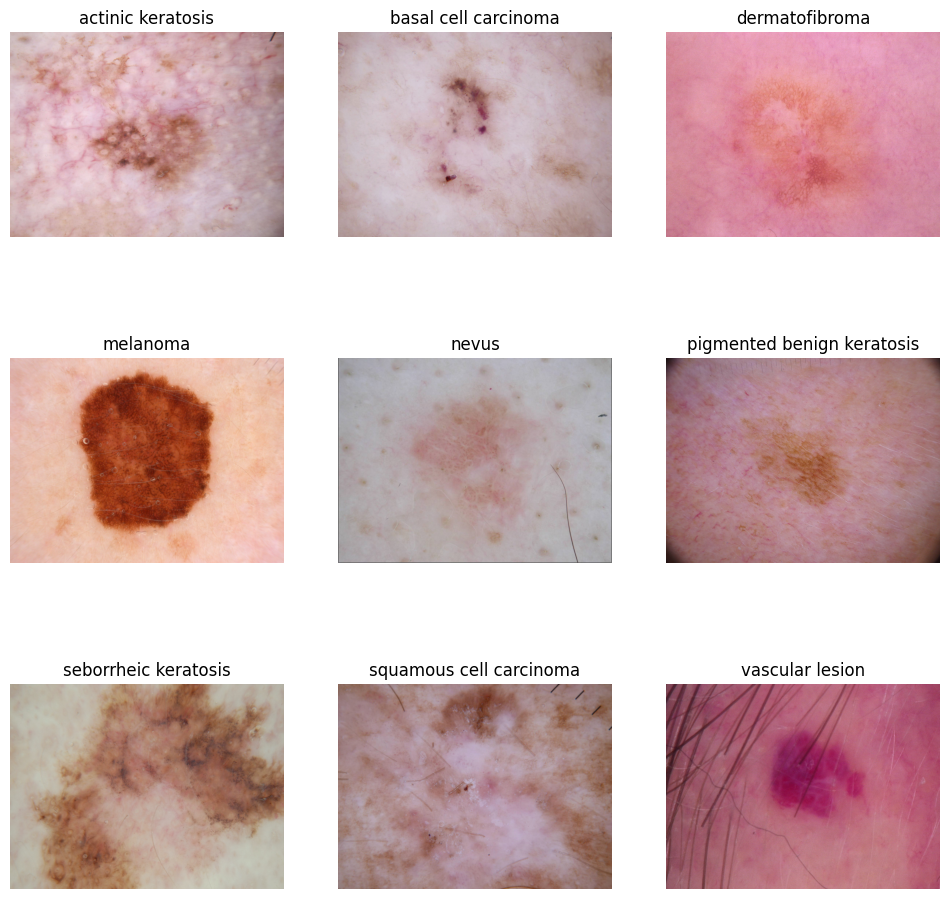

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

file_path = []
for dir_name in class_names:
  dir_path_per_class = str(data_dir_train) + "/" + dir_name
  # print(dir_path_per_class)
  for file_name in glob(dir_path_per_class+'/*.jpg', recursive=True):
    file_path.append(file_name)
    break
# print(file_path)

### your code goes here, you can use training or validation data to visualize
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
for i in range(len(class_names)):
  ax = plt.subplot(3,3 , i+1)
  img = mpimg.imread(file_path[i])
  plt.imshow(img)
  plt.title(class_names[i])
  plt.axis('off')

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Model M1 (Base Model)
### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
# initialize variable to detect 9 classes present in dataset
# Rescaling the input image pixel from [0,255] to [0,1] by setting the scale = 1./255
# creating three CN layers with max pooling 2d, number of filter in each CN layer increasing by factor of 2 [16->32->64] with activation as "relu"
total_num_class = 9
model = tf.keras.Sequential([
    layers.Rescaling(scale = 1./255, input_shape = (180,180,3)),
    layers.Conv2D(16,3,padding='same',activation= 'relu'),
    layers.Conv2D(16,3,activation= 'relu'),
    layers.MaxPooling2D(pool_size = 2, strides = 2),

    layers.Conv2D(32,3,padding='same',activation= 'relu'),
    layers.Conv2D(32,3,activation= 'relu'),
    layers.MaxPooling2D(pool_size = 2, strides = 2),

    layers.Conv2D(64,3,padding='same',activation= 'relu'),
    layers.Conv2D(64,3,activation= 'relu'),
    layers.MaxPooling2D(pool_size = 2, strides = 2),

    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(total_num_class, activation='softmax' )
])

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [12]:
### Here I am using optimizer as adam, and loss is cross entropy
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 178, 178, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 16)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 89, 89, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 87, 87, 32)        9248      
                                                        

### Train the model

In [14]:
# setting epochs = 20
epochs = 20

#fitting the model
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 [==============================] - 745s 3s/step - loss: 1.9396 - accuracy: 0.2684 - val_loss: 1.7636 - val_accuracy: 0.3557
Epoch 2/20
56/56 [==============================] - 2s 43ms/step - loss: 1.7362 - accuracy: 0.3677 - val_loss: 1.6687 - val_accuracy: 0.3937
Epoch 3/20
56/56 [==============================] - 3s 45ms/step - loss: 1.6088 - accuracy: 0.4302 - val_loss: 1.5337 - val_accuracy: 0.4541
Epoch 4/20
56/56 [==============================] - 2s 44ms/step - loss: 1.5455 - accuracy: 0.4470 - val_loss: 1.5454 - val_accuracy: 0.4474
Epoch 5/20
56/56 [==============================] - 2s 42ms/step - loss: 1.4608 - accuracy: 0.4816 - val_loss: 1.4274 - val_accuracy: 0.5101
Epoch 6/20
56/56 [==============================] - 2s 42ms/step - loss: 1.4942 - accuracy: 0.4721 - val_loss: 1.4361 - val_accuracy: 0.4966
Epoch 7/20
56/56 [==============================] - 2s 42ms/step - loss: 1.3774 - accuracy: 0.5117 - val_loss: 1.4988 - val_accuracy: 0.4743
Epoch 8/20
56/56 [======

### Visualizing training results

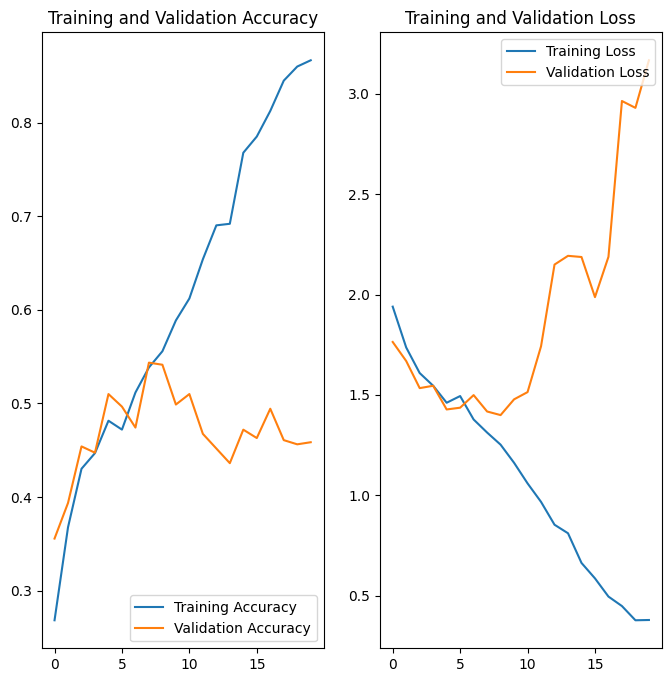

In [15]:
# creating plots for traning and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Findings / Observations
- It is evident from the graph that the model is **overfitting** insanely with training accuracy of 0.8666 and validation accuracy of  0.4586.
- It is performing excellent on training dataset but performance is poor on validation or unseen dataset.
- It is clearly a bad model, and could be life threatening, need tackle this problem of overfitting.


# Model M2 (With Augmentation)

Trying Augmentation strategy by adding:
-  layer for random flip with mode = "horizontal and vertical"
-  layer for random rotation with factor of 0.2, which will results in an output rotating by a random amount in the range [-20% * 2pi, 20% * 2pi]
-  layer for random zoom with height factor of (0.2,0.3) and width factor of (0.2, 0.3)

In [16]:
data_aug = keras.Sequential([
                layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])


In [17]:
model = tf.keras.Sequential([
    data_aug, # augmentation
    layers.Rescaling(scale = 1./255, input_shape = (180,180,3)),
    layers.Conv2D(16,3,padding='same',activation= 'relu'),
    layers.Conv2D(16,3,activation= 'relu'),
    layers.MaxPooling2D(pool_size = 2, strides = 2),

    layers.Conv2D(32,3,padding='same',activation= 'relu'),
    layers.Conv2D(32,3,activation= 'relu'),
    layers.MaxPooling2D(pool_size = 2, strides = 2),

    layers.Conv2D(64,3,padding='same',activation= 'relu'),
    layers.Conv2D(64,3,activation= 'relu'),
    layers.MaxPooling2D(pool_size = 2, strides = 2),

    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(total_num_class,activation='softmax')
])

In [18]:
### Here I am using optimizer as adam, and loss is cross entropy
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
# View the summary of all layers
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 conv2d_7 (Conv2D)           (None, 178, 178, 16)      2320      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 89, 89, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 89, 89, 32)        4640      
                                                      

In [20]:
# fitting the model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 6s 52ms/step - loss: 1.9261 - accuracy: 0.2835 - val_loss: 1.6480 - val_accuracy: 0.4049
Epoch 2/20
56/56 [==============================] - 2s 43ms/step - loss: 1.6064 - accuracy: 0.4275 - val_loss: 1.5082 - val_accuracy: 0.4810
Epoch 3/20
56/56 [==============================] - 3s 49ms/step - loss: 1.4937 - accuracy: 0.4699 - val_loss: 1.5258 - val_accuracy: 0.4474
Epoch 4/20
56/56 [==============================] - 3s 45ms/step - loss: 1.4608 - accuracy: 0.4933 - val_loss: 1.4905 - val_accuracy: 0.4855
Epoch 5/20
56/56 [==============================] - 2s 44ms/step - loss: 1.4102 - accuracy: 0.4994 - val_loss: 1.3902 - val_accuracy: 0.5280
Epoch 6/20
56/56 [==============================] - 2s 43ms/step - loss: 1.4017 - accuracy: 0.5067 - val_loss: 1.4821 - val_accuracy: 0.4832
Epoch 7/20
56/56 [==============================] - 3s 48ms/step - loss: 1.3593 - accuracy: 0.5112 - val_loss: 1.3995 - val_accuracy: 0.5123
Epoch 8/20
56

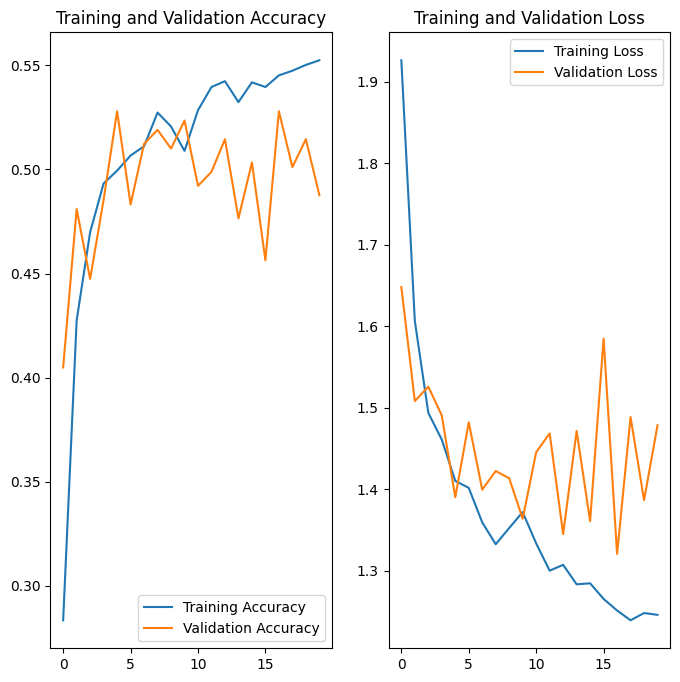

In [21]:
## Todo, visualize augmentation strategy works for one instance of training image.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Findings / Observations
- It is clearly visible that the problem of overfitting is not there as training accuracy is 0.5525 and validation accuracy is 0.4877.
- Adding a Augmentation Layers handled the overfitting problem, but its not doing anything good either, as performance of model is degraded.

# Model M3 (With Augmentation and Dropouts)

In [22]:
## using Dropout layer if there is an evidence of overfitting in your findings

model = tf.keras.Sequential([
    data_aug, # augmentation
    layers.Rescaling(scale = 1./255, input_shape = (180,180,3)),
    layers.Conv2D(16,3,padding='same',activation= 'relu'),
    layers.Conv2D(16,3,activation= 'relu'),
    layers.MaxPooling2D(pool_size = 2, strides = 2),
    layers.Dropout(0.2),  # droupout layer

    layers.Conv2D(32,3,padding='same',activation= 'relu'),
    layers.Conv2D(32,3,activation= 'relu'),
    layers.MaxPooling2D(pool_size = 2, strides = 2),
    layers.Dropout(0.2),  # droupout layer

    layers.Conv2D(64,3,padding='same',activation= 'relu'),
    layers.Conv2D(64,3,activation= 'relu'),
    layers.MaxPooling2D(pool_size = 2, strides = 2),
    layers.Dropout(0.2), # droupout layer

    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.2),  # droupout layer
    layers.Dense(total_num_class,activation='softmax')
])

### Compiling the model

In [23]:
### Here I am using optimizer as adam, and loss is cross entropy
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
# View the summary of all layers
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 conv2d_13 (Conv2D)          (None, 178, 178, 16)      2320      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 89, 89, 16)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 89, 89, 16)        0         
                                                      

### Training the model

In [25]:
# fitting the model with epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 7s 68ms/step - loss: 2.0896 - accuracy: 0.1825 - val_loss: 2.0725 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 3s 60ms/step - loss: 1.9991 - accuracy: 0.2316 - val_loss: 1.9070 - val_accuracy: 0.2550
Epoch 3/20
56/56 [==============================] - 3s 62ms/step - loss: 1.9221 - accuracy: 0.2863 - val_loss: 1.7676 - val_accuracy: 0.3468
Epoch 4/20
56/56 [==============================] - 3s 61ms/step - loss: 1.7050 - accuracy: 0.3622 - val_loss: 1.6560 - val_accuracy: 0.3535
Epoch 5/20
56/56 [==============================] - 3s 59ms/step - loss: 1.6275 - accuracy: 0.4001 - val_loss: 1.5776 - val_accuracy: 0.4474
Epoch 6/20
56/56 [==============================] - 3s 63ms/step - loss: 1.6185 - accuracy: 0.4146 - val_loss: 1.5883 - val_accuracy: 0.4027
Epoch 7/20
56/56 [==============================] - 3s 61ms/step - loss: 1.6058 - accuracy: 0.4213 - val_loss: 1.6136 - val_accuracy: 0.4295
Epoch 8/20
56

### Visualizing the results

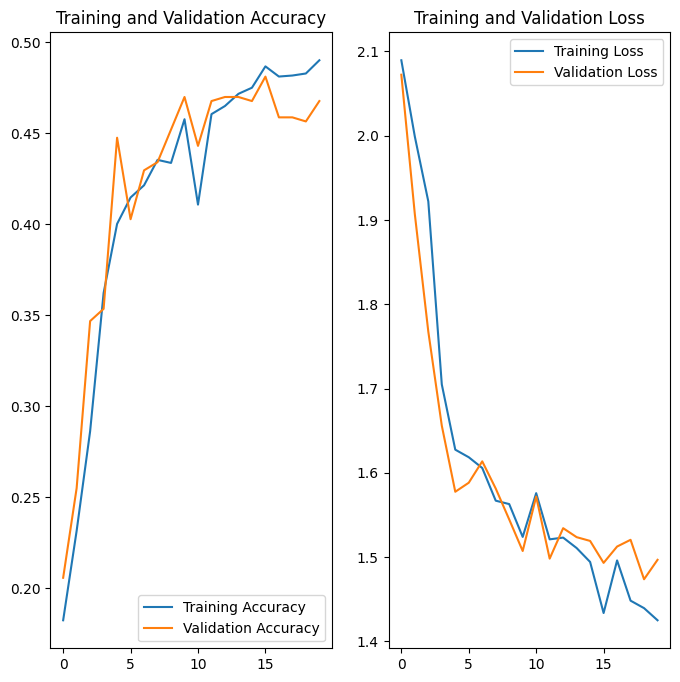

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Findings / Observations
- There no improvement in model by adding dropouts
- There is a slight decrease in training accuracy (0.4900) as well as validation accuracy (0.4676)

Lets increase the CN layer units in the model

# Model M4 (With Augmentation, Dropouts and CN layer)

In [27]:
# Model M4 With Augmentation, Dropouts, CN layer unit
model = tf.keras.Sequential([
    data_aug, #augmentation
    layers.Rescaling(scale = 1./255, input_shape = (180,180,3)),
    layers.Conv2D(16,3,padding='same',activation= 'relu'),
    layers.Conv2D(16,3,activation= 'relu'),
    layers.MaxPooling2D(pool_size = 2, strides = 2),
    layers.Dropout(0.2), # droupout layer

    layers.Conv2D(32,3,padding='same',activation= 'relu'),
    layers.Conv2D(32,3,activation= 'relu'),
    layers.MaxPooling2D(pool_size = 2, strides = 2),
    layers.Dropout(0.2), # droupout layer

    layers.Conv2D(64,3,padding='same',activation= 'relu'),
    layers.Conv2D(64,3,activation= 'relu'),
    layers.MaxPooling2D(pool_size = 2, strides = 2),
    layers.Dropout(0.2), # droupout layer

    # addtional CN unit (layer)
    layers.Conv2D(128,3,padding='same',activation="relu"),
    layers.Conv2D(128,3,activation="relu"),
    layers.MaxPool2D((2,2),strides=2),
    layers.Dropout(0.25), # droupout layer


    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.2), # droupout layer
    layers.Dense(total_num_class, activation='softmax')
])

### Compiling the model

In [28]:
### Here I am using optimizer as adam, and loss is cross entropy
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [29]:
# View the summary of all layers
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 conv2d_19 (Conv2D)          (None, 178, 178, 16)      2320      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 89, 89, 16)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 89, 89, 16)        0         
                                                      

### Training the model

In [30]:
# fitting the model with epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 8s 69ms/step - loss: 2.0534 - accuracy: 0.1925 - val_loss: 2.0071 - val_accuracy: 0.1946
Epoch 2/20
56/56 [==============================] - 4s 66ms/step - loss: 1.8731 - accuracy: 0.3097 - val_loss: 1.7911 - val_accuracy: 0.3736
Epoch 3/20
56/56 [==============================] - 4s 63ms/step - loss: 1.7020 - accuracy: 0.3806 - val_loss: 1.7521 - val_accuracy: 0.3647
Epoch 4/20
56/56 [==============================] - 3s 62ms/step - loss: 1.6419 - accuracy: 0.3951 - val_loss: 1.6033 - val_accuracy: 0.4295
Epoch 5/20
56/56 [==============================] - 3s 62ms/step - loss: 1.6524 - accuracy: 0.4035 - val_loss: 1.6472 - val_accuracy: 0.4251
Epoch 6/20
56/56 [==============================] - 4s 64ms/step - loss: 1.5818 - accuracy: 0.4241 - val_loss: 1.6132 - val_accuracy: 0.4183
Epoch 7/20
56/56 [==============================] - 3s 63ms/step - loss: 1.5771 - accuracy: 0.4459 - val_loss: 1.5885 - val_accuracy: 0.4139
Epoch 8/20
56

### Visualizing the results

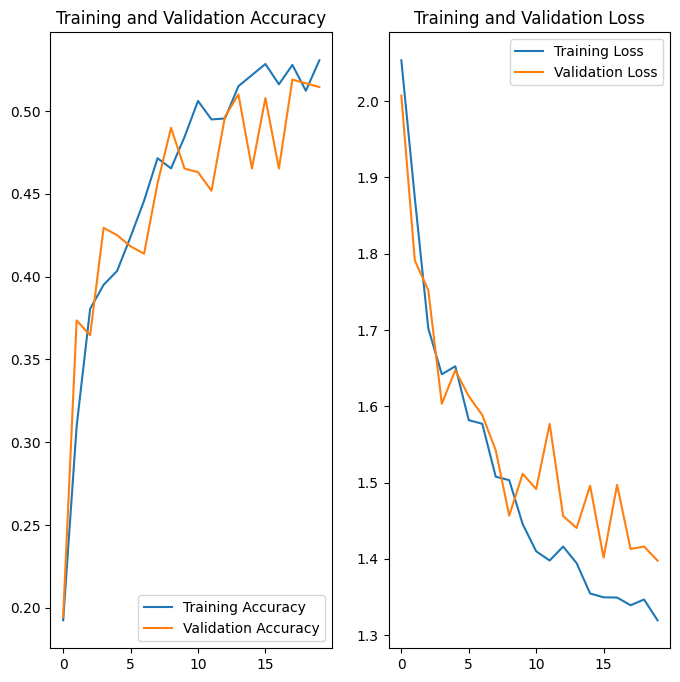

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Findings / Observations
- There is an improvement by adding an additional CN layer
- traning accuracy increase to 0.5307 and validation accuracy increased to 0.5145
- Moreover, there is no overfitting as traning and validatin are in close proximity

Lets see if we can do better by using BatchNormalisation


# Model M5 (With Augmentation,  Dropouts, CN layer and Batch Normalization)

In [32]:
# Model M5 With Augmentation, Dropouts, CN layer and Batch Normalization
model = tf.keras.Sequential([
    data_aug, #augmentation
    layers.Rescaling(scale = 1./255, input_shape = (180,180,3)),
    layers.Conv2D(16,3,padding='same',activation= 'relu'),
    layers.BatchNormalization(), # batch normalization
    layers.Conv2D(16,3,activation= 'relu'),
    layers.BatchNormalization(), # batch normalization
    layers.MaxPooling2D(pool_size = 2, strides = 2),
    layers.Dropout(0.2), # droupout layer

    layers.Conv2D(32,3,padding='same',activation= 'relu'),
    layers.BatchNormalization(), # batch normalization
    layers.Conv2D(32,3,activation= 'relu'),
    layers.BatchNormalization(), # batch normalization
    layers.MaxPooling2D(pool_size = 2, strides = 2),
    layers.Dropout(0.2), # droupout layer

    layers.Conv2D(64,3,padding='same',activation= 'relu'),
    layers.BatchNormalization(), # batch normalization
    layers.Conv2D(64,3,activation= 'relu'),
    layers.BatchNormalization(), # batch normalization
    layers.MaxPooling2D(pool_size = 2, strides = 2),
    layers.Dropout(0.2), # droupout layer

    # additional CNN unit
    layers.Conv2D(128,3,padding='same',activation="relu"),
    layers.BatchNormalization(), # batch normalization
    layers.Conv2D(128,3,activation="relu"),
    layers.BatchNormalization(), # batch normalization
    layers.MaxPool2D((2,2),strides=2),
    layers.Dropout(0.2), # droupout layer


    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.2), # droupout layer
    layers.Dense(total_num_class, activation='softmax')
])

### Compiling the model

In [33]:
### Here I am using optimizer as adam, and loss is cross entropy
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [34]:
# View the summary of all layers
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 180, 180, 16)      64        
 Normalization)                                                  
                                                                 
 conv2d_27 (Conv2D)          (None, 178, 178, 16)      2320      
                                                                 
 batch_normalization_1 (Bat  (None, 178, 178, 16)      64        
 chNormalization)                                     

### Training the model

In [35]:
# fitting the model with epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 11s 94ms/step - loss: 2.6986 - accuracy: 0.3086 - val_loss: 2.8316 - val_accuracy: 0.2148
Epoch 2/20
56/56 [==============================] - 5s 86ms/step - loss: 1.7639 - accuracy: 0.3923 - val_loss: 3.6891 - val_accuracy: 0.1924
Epoch 3/20
56/56 [==============================] - 5s 89ms/step - loss: 1.6879 - accuracy: 0.4057 - val_loss: 5.1044 - val_accuracy: 0.1499
Epoch 4/20
56/56 [==============================] - 5s 89ms/step - loss: 1.5912 - accuracy: 0.4425 - val_loss: 3.9330 - val_accuracy: 0.1499
Epoch 5/20
56/56 [==============================] - 5s 87ms/step - loss: 1.5314 - accuracy: 0.4559 - val_loss: 4.7567 - val_accuracy: 0.2103
Epoch 6/20
56/56 [==============================] - 5s 89ms/step - loss: 1.5523 - accuracy: 0.4615 - val_loss: 4.0677 - val_accuracy: 0.2148
Epoch 7/20
56/56 [==============================] - 5s 88ms/step - loss: 1.5603 - accuracy: 0.4392 - val_loss: 2.1013 - val_accuracy: 0.2506
Epoch 8/20
5

### Visualizing the results

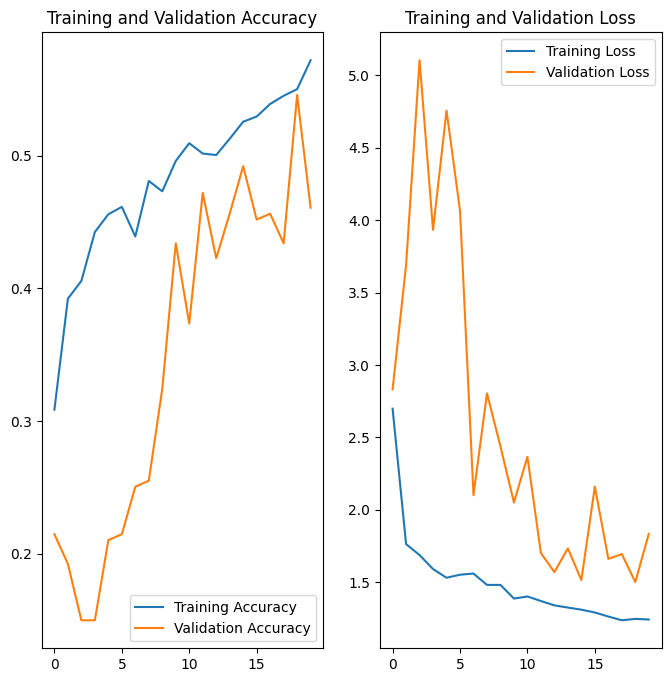

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Findings / Observations
- There is an increase in traning accuracy (0.5720) and a drop has been seen validation accuracy (0.4609).

Even though overfitting is handled (atleast not bad as base model), still we dont have good model, may be we have class imbalance, lets check that

In [37]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

[]

In [38]:
lesion_list = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list

[]

In [39]:
dataframe_dict = dict(zip(path_list, lesion_list))

In [40]:
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])

In [41]:
original_df['Label'].value_counts()

Series([], Name: Label, dtype: int64)

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<Figure size 1000x1000 with 0 Axes>

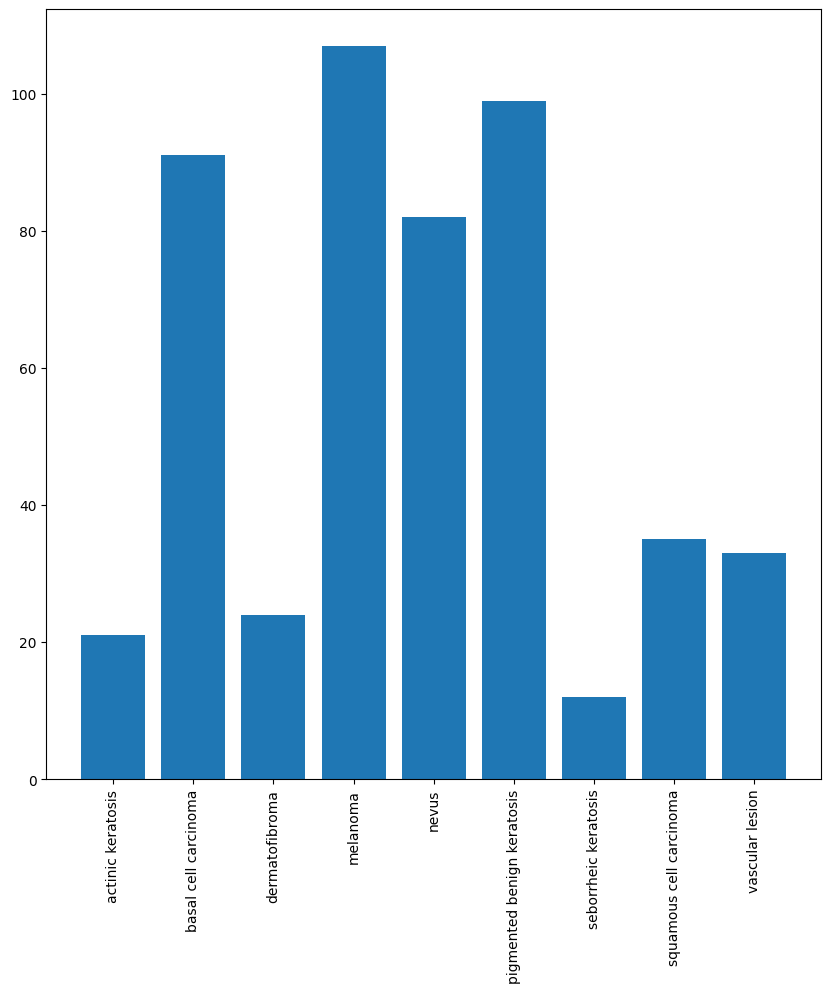

In [42]:

import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
data = dict()

for i in class_names:
  data[i] = []

plt.figure(figsize=(10, 10))
for images, labels in tfds.as_numpy(train_ds):
  for i in range(9):
    data[class_names[labels[i]]].append(images[i].astype("uint8"))

for i in data:
  data[i] = len(data[i])

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plt.bar(range(len(data)), list(data.values()), align='center')
plt.xticks(range(len(data)), list(data.keys()),rotation = 90)
plt.show()

#### Finding and Observation:
#### - **SEBORRHEIC** keratosis has the least number of sample
#### - **MELANOMA, NEVUS, PIGMENTED BENIGN KERATOSIS, and BASAL CELL CARCINOMA** classes dominate the data in terms proportionate number of samples


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [43]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [44]:
path_to_training_dataset = data_dir_train
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(data_dir_train) + "/" + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DB5DAD3E9B0>: 100%|██████████| 500/500 [00:23<00:00, 21.18 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7DB5EC217FA0>: 100%|██████████| 500/500 [00:21<00:00, 22.94 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7DB5DADA3190>: 100%|██████████| 500/500 [00:23<00:00, 21.11 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7DB5DC7B3970>: 100%|██████████| 500/500 [01:26<00:00,  5.77 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=2592x1944 at 0x7DB5E007A020>: 100%|██████████| 500/500 [01:14<00:00,  6.74 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7DB5E0261120>: 100%|██████████| 500/500 [00:17<00:00, 28.37 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7DB5E003AD10>: 100%|██████████| 500/500 [00:42<00:00, 11.67 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7DB5E003AD70>: 100%|██████████| 500/500 [00:17<00:00, 28.16 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7DB5E02632B0>: 100%|██████████| 500/500 [00:18<00:00, 27.18 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [45]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [46]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011158.jpg_913633d8-88cb-455b-9c4a-5b1d3c6792a7.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0010925.jpg_586ab8fa-35c5-40ab-8c29-d59d3e44f7a9.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011185.jpg_807cfcdf-cc09-483d-aed4-98e31a402c26.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output/seborrheic keratosis_original_ISIC_0011099.jpg_20871e94-826e-4764-9ffd-37d7386cd7bf.jpg',
 '/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Col

In [47]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',
 'seborrheic keratosis',


In [48]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [49]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

<ipython-input-49-17a6b079869a>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [50]:
new_df['Label'].value_counts()

seborrheic keratosis          500
squamous cell carcinoma       500
pigmented benign keratosis    500
vascular lesion               500
dermatofibroma                500
actinic keratosis             500
nevus                         500
melanoma                      500
basal cell carcinoma          500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [51]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [52]:
data_dir_train=data_dir_train
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [53]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [54]:

# AutoTune & cache for performance

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


#### **Todo:** Create your model (make sure to include normalization)

In [68]:
# Model M4 With Augmentation,  Dropouts,  and After every CN layer, CN layer and Batch Normalization
model = tf.keras.Sequential([
    data_aug, #augmentation
    layers.Rescaling(scale = 1./255, input_shape = (180,180,3)),
    layers.Conv2D(16,3,padding='same',activation= 'relu'),
    layers.BatchNormalization(), # batch normalization
    layers.Conv2D(16,3,activation= 'relu'),
    layers.BatchNormalization(), # batch normalization
    layers.MaxPooling2D(pool_size = 2, strides = 2),
    layers.Dropout(0.3), # droupout layer

    layers.Conv2D(32,3,padding='same',activation= 'relu'),
    layers.BatchNormalization(), # batch normalization
    layers.Conv2D(32,3,activation= 'relu'),
    layers.BatchNormalization(), # batch normalization
    layers.MaxPooling2D(pool_size = 2, strides = 2),
    layers.Dropout(0.3), # droupout layer

    layers.Conv2D(64,3,padding='same',activation= 'relu'),
    layers.BatchNormalization(), # batch normalization
    layers.Conv2D(64,3,activation= 'relu'),
    layers.BatchNormalization(), # batch normalization
    layers.MaxPooling2D(pool_size = 2, strides = 2),
    layers.Dropout(0.3), # droupout layer

    # additional CNN unit
    layers.Conv2D(128,3,padding='same',activation="relu"),
    layers.BatchNormalization(), # batch normalization
    layers.Conv2D(128,3,activation="relu"),
    layers.BatchNormalization(), # batch normalization
    layers.MaxPool2D((2,2),strides=2),
    layers.Dropout(0.3), # droupout layer


    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.25), # droupout layer
    layers.Dense(total_num_class)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [69]:
### Here I am using optimizer as adam, and loss is cross entropy
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [70]:
# View the summary of all layers
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_8 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_58 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 batch_normalization_32 (Ba  (None, 180, 180, 16)      64        
 tchNormalization)                                               
                                                                 
 conv2d_59 (Conv2D)          (None, 178, 178, 16)      2320      
                                                                 
 batch_normalization_33 (Ba  (None, 178, 178, 16)      64        
 tchNormalization)                                    

#### **Todo:**  Train your model

In [71]:
epochs = 32
## Your code goes here, use 50 epochs.
history =  model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/32
169/169 [==============================] - 21s 90ms/step - loss: 2.0865 - accuracy: 0.2893 - val_loss: 7.8402 - val_accuracy: 0.1574
Epoch 2/32
169/169 [==============================] - 15s 88ms/step - loss: 1.7864 - accuracy: 0.3233 - val_loss: 2.3746 - val_accuracy: 0.1173
Epoch 3/32
169/169 [==============================] - 15s 89ms/step - loss: 1.6848 - accuracy: 0.3687 - val_loss: 2.2141 - val_accuracy: 0.2754
Epoch 4/32
169/169 [==============================] - 15s 92ms/step - loss: 1.6225 - accuracy: 0.3802 - val_loss: 2.4025 - val_accuracy: 0.3356
Epoch 5/32
169/169 [==============================] - 15s 87ms/step - loss: 1.5669 - accuracy: 0.3915 - val_loss: 3.0553 - val_accuracy: 0.2999
Epoch 6/32
169/169 [==============================] - 15s 88ms/step - loss: 1.5103 - accuracy: 0.4210 - val_loss: 1.6141 - val_accuracy: 0.3727
Epoch 7/32
169/169 [==============================] - 15s 87ms/step - loss: 1.4680 - accuracy: 0.4312 - val_loss: 1.8547 - val_accuracy:

#### **Todo:**  Visualize the model results

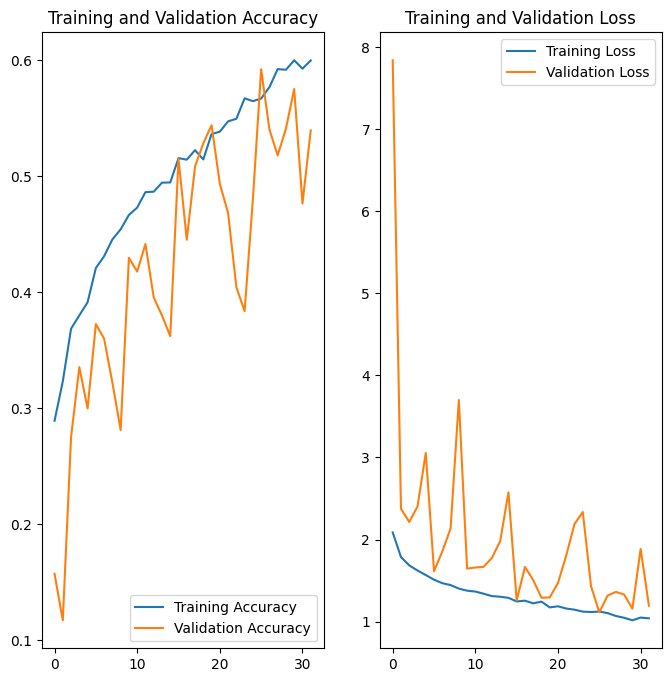

In [72]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



#### Finding/ Observation
- As compared to all the previous model we have pretty satisfactory results: tranining accuracy of 0.6000 and validation accuracy of 0.5397.
- Compared to Base Model with training accuracy of 0.8917 and validation accuracy of 0.4855 (**Overfitting**). There is no Overfitting noticed here as validation and traning accuracy are in close proximity or overlapping.
- We can say that **CLASS REBALANCE** does help alot in training a CNN model.